<a href="https://colab.research.google.com/github/Timochik/Hw_datascience/blob/main/Data_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Імпортуємо необхідні бібліотеки
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Завантажимо датасет Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Нормалізуємо дані
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
# Побудова моделі
def create_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [5]:
# Створимо модель
model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Навчання моделі
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7513 - loss: 0.7115 - val_accuracy: 0.8441 - val_loss: 0.4345
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8476 - loss: 0.4192 - val_accuracy: 0.8672 - val_loss: 0.3731
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8633 - loss: 0.3784 - val_accuracy: 0.8722 - val_loss: 0.3595
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8728 - loss: 0.3462 - val_accuracy: 0.8770 - val_loss: 0.3339
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8767 - loss: 0.3313 - val_accuracy: 0.8798 - val_loss: 0.3319
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8819 - loss: 0.3213 - val_accuracy: 0.8783 - val_loss: 0.3309
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8881 - loss: 0.3050 - val_accuracy: 0.8838 - val_loss: 0.3277
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8870 - loss: 0.3062 

In [7]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nТочність на тестових даних:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8765 - loss: 0.3495

Точність на тестових даних: 0.8766999840736389


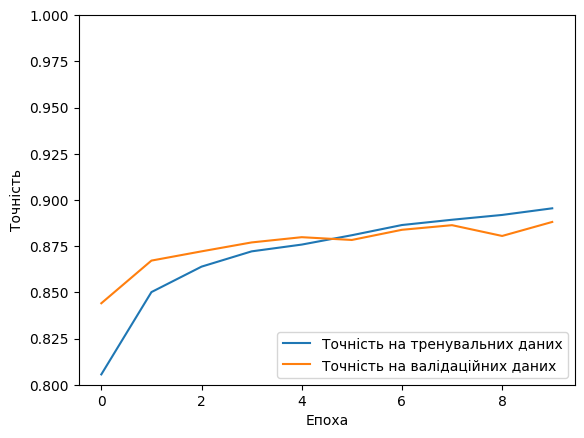

In [8]:
# Візуалізація результатів
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label = 'Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()
